In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def normOfDiference(list1,list2):
    arr1=np.array(list1)
    arr2=np.array(list2)
    dif=np.subtract(arr1,arr2)
    return round(np.linalg.norm(dif),3)

allBestData_df=pd.read_excel("BestMedianResults.xlsx",index_col=0)





data={}
for ref in range(len(allBestData_df.columns)):   
    fila=[]
    list1=allBestData_df.iloc[-8:,ref].to_list()
    rowName=allBestData_df.iloc[-8:,ref].name
    for i in range(len(allBestData_df.columns)):
        list2=allBestData_df.iloc[-8:,i].to_list()
        fila.append(normOfDiference(list1,list2))
    data[rowName]=fila

relationMatrix=pd.DataFrame(data,index=allBestData_df.columns)
mIndex=[]
for i in relationMatrix.columns.to_list():
    mIndex.append((int(i[:4]),int(i[5:])))

# 
index = pd.MultiIndex.from_tuples(mIndex, names=["Year", "Week"])


RelationMatrix=pd.DataFrame(relationMatrix.values,index,columns=index)
AllBestData=pd.DataFrame(allBestData_df.values,allBestData_df.index,columns=index)
    


In [182]:
pd.Series(newRow,name="minWeek")

0    52
1    52
2    51
3    48
4    52
Name: minWeek, dtype: int64

In [266]:
"""Estrategia 1 """

ref=48


newRow=[RelationMatrix[2016,ref][2015].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2017,ref][2016].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2018,ref][2017].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2019,ref][2018].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2020,ref][2019].loc[ref-2:ref+2].idxmin()]
print(newRow)
pd.concat([RelationMatrix[2016,ref][2015].loc[ref-2:ref+2],
           RelationMatrix[2017,ref][2016].loc[ref-2:ref+2],
           RelationMatrix[2018,ref][2017].loc[ref-2:ref+2],
           RelationMatrix[2019,ref][2018].loc[ref-2:ref+2],
           RelationMatrix[2020,ref][2019].loc[ref-2:ref+2]],axis=1).sort_values("Week")






[46, 49, 48, 48, 48]


,2016,2017,2018,2019,2020
,48,48,48,48,48
Week,,,,,
46,8.490,9.946,10.112,12.165,6.844
47,11.054,10.150,9.886,10.765,6.021
48,9.665,11.536,8.301,3.742,5.730
49,10.764,7.435,9.552,10.968,13.131
50,12.404,11.658,10.088,5.789,9.224


In [264]:
"""Estrategia 2"""

ref=47


newRow=[RelationMatrix[2016,ref][2015].loc[ref-4:ref].idxmin(),
           RelationMatrix[2017,ref][2016].loc[ref-4:ref].idxmin(),
           RelationMatrix[2018,ref][2017].loc[ref-4:ref].idxmin(),
           RelationMatrix[2019,ref][2018].loc[ref-4:ref].idxmin(),
           RelationMatrix[2020,ref][2019].loc[ref-4:ref].idxmin()]
print(newRow)
pd.concat([RelationMatrix[2016,ref][2015].loc[ref-4:ref],
           RelationMatrix[2017,ref][2016].loc[ref-4:ref],
           RelationMatrix[2018,ref][2017].loc[ref-4:ref],
           RelationMatrix[2019,ref][2018].loc[ref-4:ref],
           RelationMatrix[2020,ref][2019].loc[ref-4:ref]],axis=1).sort_values("Week")






[44, 44, 44, 45, 45]


,2016,2017,2018,2019,2020
,47,47,47,47,47
Week,,,,,
43,9.987,13.216,9.835,9.192,8.392
44,5.820,8.045,4.172,7.601,7.993
45,10.040,11.357,5.794,4.183,5.473
46,17.390,8.822,10.635,9.085,8.481
47,13.464,12.117,12.225,7.273,6.199


"""Estrategia 3"""

ref=43
ref-=1


newRow=[RelationMatrix[2016,ref][2015].loc[ref-4:ref].idxmin(),
           RelationMatrix[2017,ref][2016].loc[ref-4:ref].idxmin(),
           RelationMatrix[2018,ref][2017].loc[ref-4:ref].idxmin(),
           RelationMatrix[2019,ref][2018].loc[ref-4:ref].idxmin(),
           RelationMatrix[2020,ref][2019].loc[ref-4:ref].idxmin()]
print(newRow)
pd.concat([RelationMatrix[2016,ref][2015].loc[ref-4:ref],
           RelationMatrix[2017,ref][2016].loc[ref-4:ref],
           RelationMatrix[2018,ref][2017].loc[ref-4:ref],
           RelationMatrix[2019,ref][2018].loc[ref-4:ref],
           RelationMatrix[2020,ref][2019].loc[ref-4:ref]],axis=1).sort_values("Week")






{'SlFactor': 4.54,
 'TpFactor': 6.1,
 'atrPeriod': 19.0,
 'delta': 0.26,
 'option': 2.0,
 'fastEmaPeriod': 5.0,
 'slowEMAPeriod': 13.0,
 'vwapZoneMultiplyer': 3.0}

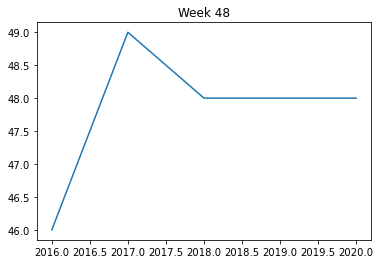

In [267]:
years=[2016,2017,2018,2019,2020]
pd.Series(newRow,years).plot(title='Week '+str(ref))

W52=pd.concat([AllBestData[years[0],newRow[0]],
    AllBestData[years[1],newRow[1]],
    AllBestData[years[2],newRow[2]],
    AllBestData[years[3],newRow[3]],
    AllBestData[years[4],newRow[4]]],axis=1).iloc[8:,:].T



new_configuration = {
    "SlFactor":W52.loc[:,"SlFactor"].mean(),
    "TpFactor":W52.loc[:,"TpFactor"].mean(),
    "atrPeriod":W52.loc[:,"atrPeriod"].median(),
    "delta":-1,
    "option":W52.loc[:,"option"].mode().iloc[0],
    "fastEmaPeriod":W52.loc[:,"fastEmaPeriod"].median(),
    "slowEMAPeriod":W52.loc[:,"slowEMAPeriod"].median(),
    "vwapZoneMultiplyer":W52.loc[:,"vwapZoneMultiplyer"].median()
}

if new_configuration["option"] == 2:
    new_configuration["delta"] = W52[W52.option==2].delta.mean()

elif new_configuration["option"] == 1:
    new_configuration["delta"] = W52[W52.option==1].delta.mean()
else:
    new_configuration["delta"] = 0
    
new_configuration


In [228]:
W52

,,SlFactor,TpFactor,atrPeriod,delta,option,fastEmaPeriod,slowEMAPeriod,vwapZoneMultiplyer
2016,48,0.9,2.5,22.0,0.33,2.0,7.0,21.0,3.0
2017,46,0.8,3.8,22.0,0.03,2.0,8.0,14.0,10.0
2018,45,4.5,5.8,15.0,0.26,1.0,10.0,17.0,2.0
2019,47,1.5,5.1,16.0,0.34,0.0,8.0,16.0,3.0
2020,49,1.0,1.2,22.0,0.42,2.0,10.0,18.0,2.0


In [229]:
W52.SlFactor

2016  48    0.9
2017  46    0.8
2018  45    4.5
2019  47    1.5
2020  49    1.0
Name: SlFactor, dtype: float64

In [200]:
print("2016W2: \n",RelationMatrix[2016,42][2015,40],
RelationMatrix[2016,42][2015,41],
RelationMatrix[2016,42][2015,42],
RelationMatrix[2017,42][2015,43],
RelationMatrix[2016,42][2015,44])
print("2017W42: \n",RelationMatrix[2017,42][2016,40],
RelationMatrix[2017,42][2016,41],
RelationMatrix[2017,42][2016,42],
RelationMatrix[2017,42][2016,43],
RelationMatrix[2017,42][2016,44])
print("2018W42: \n",RelationMatrix[2018,42][2017,40],
RelationMatrix[2018,42][2017,41],
RelationMatrix[2018,42][2017,42],
RelationMatrix[2018,42][2017,43],
RelationMatrix[2018,42][2017,44])
print("2019W42: \n",RelationMatrix[2019,42][2018,40],
RelationMatrix[2019,42][2018,41],
RelationMatrix[2019,42][2018,42],
RelationMatrix[2019,42][2018,43],
RelationMatrix[2019,42][2018,44])
print("2020W42: \n",RelationMatrix[2020,42][2019,40],
RelationMatrix[2020,42][2019,41],
RelationMatrix[2020,42][2019,42],
RelationMatrix[2020,42][2019,43],
RelationMatrix[2020,42][2019,44])

2016W42: 
 9.118 9.028 13.413 5.18 10.867
2017W42: 
 12.746 11.859 6.389 7.109 10.764
2018W42: 
 11.239 9.147 8.211 10.095 7.836
2019W42: 
 12.841 14.283 5.525 9.214 11.232
2020W42: 
 8.717 7.59 7.266 7.519 7.131
